<a href="https://colab.research.google.com/github/Africoz/ML-maths-africa/blob/main/day3_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Detective Solution (0 = innocent, 1 = involved): [1. 0. 1. 1.]

Fruit Prices:
Apple Price: $12.50
Mango Price: $17.50
Banana Price: $22.50

No solution possible (system inconsistent): Singular matrix


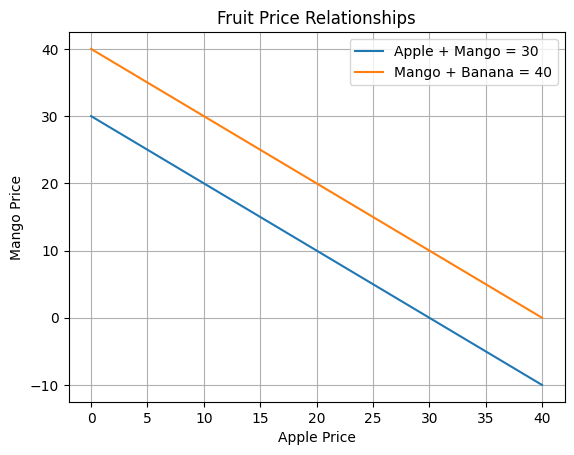

In [1]:
# Day 3 - Systems of Linear Equations (Google Colab Ready)

import numpy as np

# Example 1: Detective Case - Stolen Necklace
A = np.array([
    [1, 0, 0, 0],  # Morning
    [0, 1, 0, 0],  # Afternoon
    [0, 0, 1, 0],  # Evening
    [0, 0, 0, 1]   # Night
])

b = np.array([1, 0, 1, 1])  # Evidence where necklace was seen

# Solve Ax = b (x = who was involved)
x = np.linalg.solve(A, b)
print(f"Detective Solution (0 = innocent, 1 = involved): {x}")

# Example 2: Fruit Price Puzzle
A = np.array([
    [1, 1, 0],   # Apple + Mango = 30
    [0, 1, 1],   # Mango + Banana = 40
    [1, 0, 1]    # Apple + Banana = 35
])

b = np.array([30, 40, 35])

# Solve for individual fruit prices
prices = np.linalg.solve(A, b)

print("\nFruit Prices:")
print(f"Apple Price: ${prices[0]:.2f}")
print(f"Mango Price: ${prices[1]:.2f}")
print(f"Banana Price: ${prices[2]:.2f}")

# Explanation: np.linalg.solve works by internally doing Gaussian Elimination,
# but avoids numerical instability. It's best for square matrices (same number of
# equations and unknowns).

# Extension: What if system has no solution (inconsistent data)?
A_bad = np.array([
    [1, 1],
    [2, 2]
])
b_bad = np.array([30, 70])

try:
    x_bad = np.linalg.solve(A_bad, b_bad)
except np.linalg.LinAlgError as e:
    print("\nNo solution possible (system inconsistent):", e)

# Visualization Idea (Optional for students):
# Plotting apple price vs mango price (linear system visualization)

import matplotlib.pyplot as plt

x = np.linspace(0, 40, 100)
y1 = 30 - x  # Apple + Mango = 30
y2 = 40 - x  # Mango + Banana = 40 (shifted to fit)

plt.plot(x, y1, label="Apple + Mango = 30")
plt.plot(x, y2, label="Mango + Banana = 40")
plt.xlabel("Apple Price")
plt.ylabel("Mango Price")
plt.legend()
plt.title("Fruit Price Relationships")
plt.grid(True)
plt.show()


In [2]:
import numpy as np

# Coefficient Matrix A (each row = different market's price equation)
A = np.array([
    [1, 2, 3, 4],   # Morning Market: 1 Apple + 2 Banana + 3 Orange + 4 Mango = Total Price
    [2, 3, 2, 1],   # Afternoon Market
    [1, 1, 1, 1],   # Evening Market (sum of all)
    [3, 2, 1, 1]    # Night Market
])

# Total Cost in each market
b = np.array([50, 45, 30, 40])

def solve_fruit_prices(A, b):
    rank = np.linalg.matrix_rank(A)
    if rank < len(A):
        print("⚠️ Warning: Singular matrix detected. No unique solution possible.")
        print("Switching to pseudo-inverse (best effort solution).")
        x = np.linalg.pinv(A).dot(b)
    else:
        x = np.linalg.solve(A, b)
    return x

# Solve and Display Results
fruit_prices = solve_fruit_prices(A, b)

fruits = ['Apple', 'Banana', 'Orange', 'Mango']

for fruit, price in zip(fruits, fruit_prices):
    print(f"{fruit}: {price:.2f} currency units")



Apple: 27.50 currency units
Banana: -45.00 currency units
Orange: 77.50 currency units
Mango: -30.00 currency units
